# Xarray 

In [1]:
import xarray as xr 
import numpy as np
from matplotlib import pyplot as plt

In [2]:
da = xr.DataArray([9,0,2,1,0])
da

<xarray.DataArray (dim_0: 5)>
array([9, 0, 2, 1, 0])
Dimensions without coordinates: dim_0

In [3]:
da = xr.DataArray([9,0,2,1,0], dims=['x'])
da

<xarray.DataArray (x: 5)>
array([9, 0, 2, 1, 0])
Dimensions without coordinates: x

In [4]:
da = xr.DataArray([9,0,2,1,0], dims=['x'], coords={'x':[10,20,30,40,50]})
da

<xarray.DataArray (x: 5)>
array([9, 0, 2, 1, 0])
Coordinates:
  * x        (x) int64 10 20 30 40 50

In [5]:
da.indexes

Indexes:
    x        Index([10, 20, 30, 40, 50], dtype='int64', name='x')

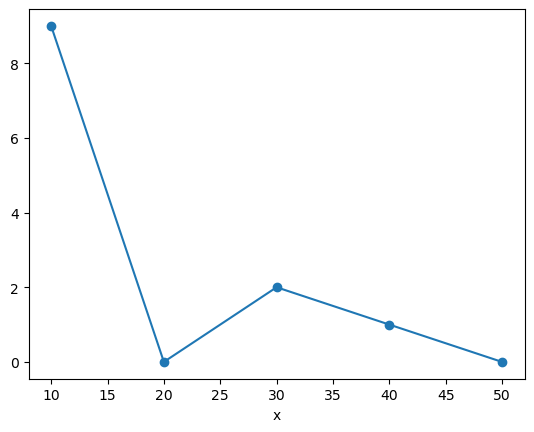

In [6]:
da.plot(marker='o')

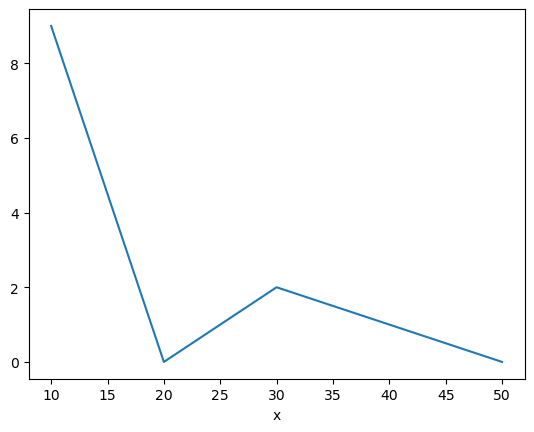

In [7]:
da.plot(x='x')

In [8]:
import pooch
url = "https://www.ldeo.columbia.edu/~rpa/float_data_4901412.zip"
files = pooch.retrieve(url, processor=pooch.Unzip(), known_hash="2a703c720302c682f1662181d329c9f22f9f10e1539dc2d6082160a469165009")
files.sort()
files

['/home/danielmw/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/P.npy',
 '/home/danielmw/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/S.npy',
 '/home/danielmw/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/T.npy',
 '/home/danielmw/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/date.npy',
 '/home/danielmw/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/lat.npy',
 '/home/danielmw/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/levels.npy',
 '/home/danielmw/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/lon.npy']

In [9]:
P = np.load(files[0])
S = np.load(files[1])
T = np.load(files[2])
date = np.load(files[3])
lat = np.load(files[4])
levels = np.load(files[5])
lon = np.load(files[6])

In [10]:
lat.shape

(75,)

In [11]:
date.shape

(75,)

In [12]:
da_salinity = xr.DataArray(S,dims = ['levels','date'], 
                           coords={'levels': levels, 
                                   'date': date})
da_salinity

<xarray.DataArray (levels: 78, date: 75)>
array([[35.6389389 , 35.51495743, 35.57297134, ..., 35.82093811,
        35.77793884, 35.66891098],
       [35.63393784, 35.5219574 , 35.57397079, ..., 35.81093216,
        35.58389664, 35.66791153],
       [35.6819458 , 35.52595901, 35.57297134, ..., 35.79592896,
        35.66290665, 35.66591263],
       ...,
       [34.91585922, 34.92390442, 34.92390442, ..., 34.93481064,
        34.94081116, 34.94680786],
       [34.91585922, 34.92390442, 34.92190552, ..., 34.93280792,
        34.93680954, 34.94380951],
       [34.91785812, 34.92390442, 34.92390442, ...,         nan,
        34.93680954,         nan]])
Coordinates:
  * levels   (levels) int64 0 1 2 3 4 5 6 7 8 9 ... 69 70 71 72 73 74 75 76 77
  * date     (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07-24T...

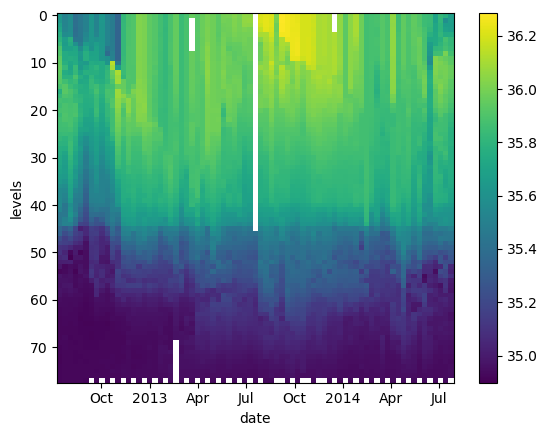

In [13]:
da_salinity.plot(yincrease=False)

In [14]:
da_salinity.attrs['units'] = 'PSU'
da_salinity.attrs['standard_name'] = 'sea_water_salinity'

In [15]:
da_salinity

<xarray.DataArray (levels: 78, date: 75)>
array([[35.6389389 , 35.51495743, 35.57297134, ..., 35.82093811,
        35.77793884, 35.66891098],
       [35.63393784, 35.5219574 , 35.57397079, ..., 35.81093216,
        35.58389664, 35.66791153],
       [35.6819458 , 35.52595901, 35.57297134, ..., 35.79592896,
        35.66290665, 35.66591263],
       ...,
       [34.91585922, 34.92390442, 34.92390442, ..., 34.93481064,
        34.94081116, 34.94680786],
       [34.91585922, 34.92390442, 34.92190552, ..., 34.93280792,
        34.93680954, 34.94380951],
       [34.91785812, 34.92390442, 34.92390442, ...,         nan,
        34.93680954,         nan]])
Coordinates:
  * levels   (levels) int64 0 1 2 3 4 5 6 7 8 9 ... 69 70 71 72 73 74 75 76 77
  * date     (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07-24T...
Attributes:
    units:          PSU
    standard_name:  sea_water_salinity

In [16]:
argo = xr.Dataset(
    data_vars={
        'salinity': (('levels','date'), S),
        'temperature':(('levels','date'),T),
        'pressure': (('levels','date'),P)
    }, 
    coords={'levels':levels, 'date': date}
)
argo

<xarray.Dataset>
Dimensions:      (levels: 78, date: 75)
Coordinates:
  * levels       (levels) int64 0 1 2 3 4 5 6 7 8 ... 69 70 71 72 73 74 75 76 77
  * date         (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07...
Data variables:
    salinity     (levels, date) float64 35.64 35.51 35.57 35.4 ... nan 34.94 nan
    temperature  (levels, date) float64 18.97 18.44 19.1 19.79 ... nan 3.714 nan
    pressure     (levels, date) float64 6.8 6.1 6.5 5.0 ... 2e+03 nan 2e+03 nan

In [17]:
argo.coords['lon'] = lon
argo

<xarray.Dataset>
Dimensions:      (levels: 78, date: 75, lon: 75)
Coordinates:
  * levels       (levels) int64 0 1 2 3 4 5 6 7 8 ... 69 70 71 72 73 74 75 76 77
  * date         (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07...
  * lon          (lon) float64 -39.13 -37.28 -36.9 ... -33.83 -34.11 -34.38
Data variables:
    salinity     (levels, date) float64 35.64 35.51 35.57 35.4 ... nan 34.94 nan
    temperature  (levels, date) float64 18.97 18.44 19.1 19.79 ... nan 3.714 nan
    pressure     (levels, date) float64 6.8 6.1 6.5 5.0 ... 2e+03 nan 2e+03 nan

In [18]:
del argo['lon']
argo.coords['lon'] = ('date',lon)
argo.coords['lat'] = ('date',lat)
argo

<xarray.Dataset>
Dimensions:      (levels: 78, date: 75)
Coordinates:
  * levels       (levels) int64 0 1 2 3 4 5 6 7 8 ... 69 70 71 72 73 74 75 76 77
  * date         (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07...
    lon          (date) float64 -39.13 -37.28 -36.9 ... -33.83 -34.11 -34.38
    lat          (date) float64 47.19 46.72 46.45 46.23 ... 42.6 42.46 42.38
Data variables:
    salinity     (levels, date) float64 35.64 35.51 35.57 35.4 ... nan 34.94 nan
    temperature  (levels, date) float64 18.97 18.44 19.1 19.79 ... nan 3.714 nan
    pressure     (levels, date) float64 6.8 6.1 6.5 5.0 ... 2e+03 nan 2e+03 nan

In [19]:
argo * 1000

<xarray.Dataset>
Dimensions:      (levels: 78, date: 75)
Coordinates:
  * levels       (levels) int64 0 1 2 3 4 5 6 7 8 ... 69 70 71 72 73 74 75 76 77
  * date         (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07...
    lon          (date) float64 -39.13 -37.28 -36.9 ... -33.83 -34.11 -34.38
    lat          (date) float64 47.19 46.72 46.45 46.23 ... 42.6 42.46 42.38
Data variables:
    salinity     (levels, date) float64 3.564e+04 3.551e+04 ... 3.494e+04 nan
    temperature  (levels, date) float64 1.897e+04 1.844e+04 ... 3.714e+03 nan
    pressure     (levels, date) float64 6.8e+03 6.1e+03 6.5e+03 ... 2e+06 nan

In [20]:
argo.coords['levels']*100

<xarray.DataArray 'levels' (levels: 78)>
array([   0,  100,  200,  300,  400,  500,  600,  700,  800,  900, 1000,
       1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100,
       2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200,
       3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300,
       4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400,
       5500, 5600, 5700, 5800, 5900, 6000, 6100, 6200, 6300, 6400, 6500,
       6600, 6700, 6800, 6900, 7000, 7100, 7200, 7300, 7400, 7500, 7600,
       7700])
Coordinates:
  * levels   (levels) int64 0 1 2 3 4 5 6 7 8 9 ... 69 70 71 72 73 74 75 76 77

In [21]:
argo.salinity[2,3]

<xarray.DataArray 'salinity' ()>
array(35.40494537)
Coordinates:
    levels   int64 2
    date     datetime64[ns] 2012-08-12T23:08:59.971200
    lon      float64 -36.89
    lat      float64 46.23

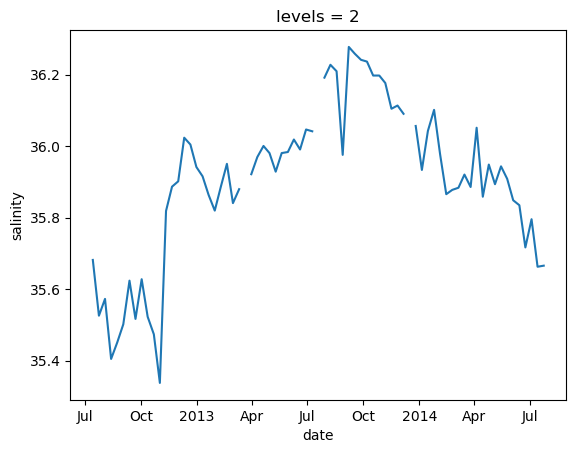

In [22]:
argo.salinity[2].plot()

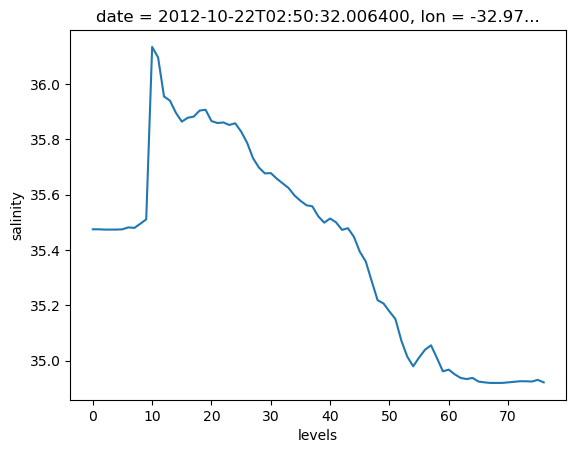

In [23]:
argo.salinity[:,10].plot()

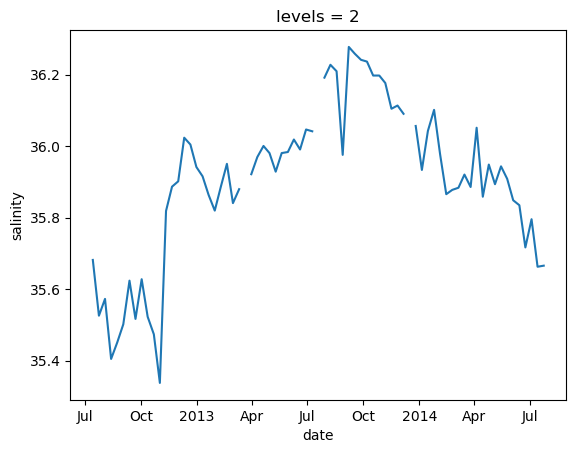

In [24]:
argo.salinity.sel(levels=2).plot()

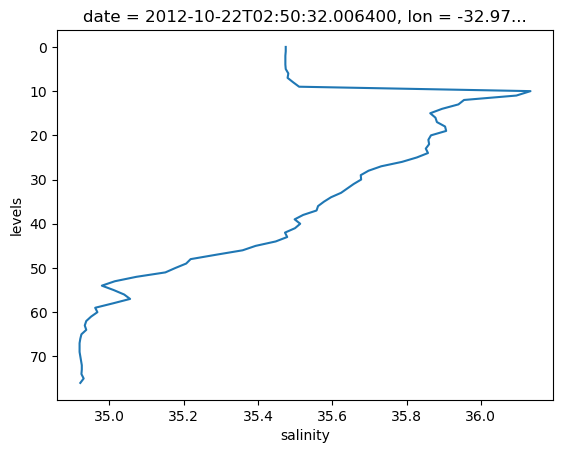

In [25]:
argo.salinity.sel(date='2012-10-22').plot(y='levels',yincrease=False)

In [26]:
argo.salinity.sel(date=slice('2012-10-01','2012-12-01'))

<xarray.DataArray 'salinity' (levels: 78, date: 7)>
array([[35.63097763, 35.52592468, 35.47483063, 35.33785629, 35.81896591,
        35.8889389 , 35.90187836],
       [35.63097763, 35.52292252, 35.47483063, 35.33685684, 35.81796646,
        35.88793945, 35.90187836],
       [35.62797546, 35.52292252, 35.47383118, 35.33785629, 35.81896591,
        35.88694   , 35.90187836],
       [35.62697601, 35.52192307, 35.47383118, 35.33785629, 35.81896591,
        35.89193726, 35.90187836],
       [35.62797546, 35.52192307, 35.47383118, 35.33785629, 35.81996536,
        35.88993835, 35.90187836],
       [35.62897873, 35.52292252, 35.47483063, 35.33785629, 35.81996536,
        35.88993835, 35.90187836],
       [35.62997818, 35.51892471, 35.48183441, 35.33785629, 35.81996536,
        35.88993835, 35.90187836],
       [35.63197708, 35.44991302, 35.47983551, 35.33785629, 35.81996536,
        35.89683914, 35.90187836],
       [35.63097763, 35.38090134, 35.4948349 , 35.33785629, 35.81896591,
        35.89583969, 35.90187836],
       [35.62697601, 35.58792114, 35.51083755, 35.33985519, 35.82497025,
        35.89683914, 35.90187836],
...
       [34.91690445, 34.92385483, 34.91975403, 34.91980362, 34.92385483,
        34.93680573, 34.93885422],
       [34.92190552, 34.92485428, 34.91975403, 34.92080688, 34.92485428,
        34.94480515, 34.9328537 ],
       [34.92390442, 34.92285538, 34.92176056, 34.92280579, 34.92985535,
        34.93280411, 34.92785645],
       [34.92390442, 34.92385483, 34.92375946, 34.92480469, 34.92685318,
        34.93780899, 34.92485428],
       [34.92390442, 34.92285538, 34.92575836, 34.92181015, 34.92085648,
        34.93680954, 34.92385483],
       [34.92590332, 34.9288559 , 34.92575836, 34.92181015, 34.92685318,
        34.93481064, 34.92585373],
       [34.92490387, 34.92785645, 34.92475891, 34.92781067, 34.93385696,
        34.93380737, 34.92385864],
       [34.92190552, 34.92385864, 34.93076324, 34.9268074 , 34.93585968,
        34.93481064, 34.92985916],
       [34.92090607, 34.92185974, 34.92176437, 34.9228096 , 34.93285751,
        34.93180847, 34.92786026],
       [        nan, 34.91985703,         nan, 34.92181015,         nan,
        34.92181015,         nan]])
Coordinates:
  * levels   (levels) int64 0 1 2 3 4 5 6 7 8 9 ... 69 70 71 72 73 74 75 76 77
  * date     (date) datetime64[ns] 2012-10-02T03:00:17.971200 ... 2012-12-01T...
    lon      (date) float64 -34.46 -33.78 -32.97 -32.55 -32.43 -32.29 -32.17
    lat      (date) float64 44.96 44.68 44.13 43.64 43.07 42.66 42.51

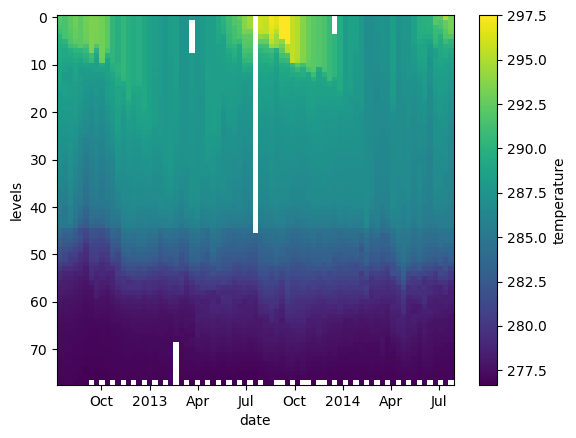

In [27]:
temp_kelvin = argo.temperature + 273.15
temp_kelvin.plot(yincrease=False)

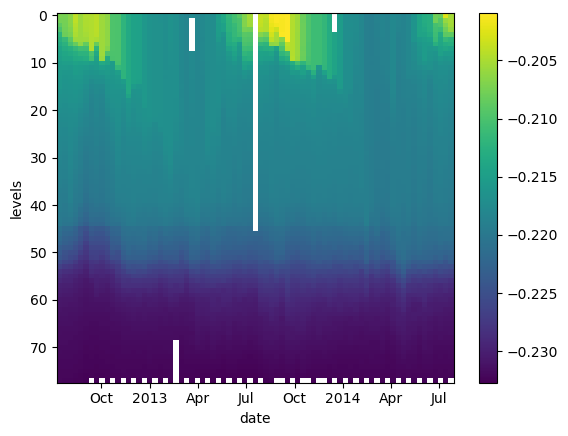

In [28]:
g = 9.8
buoyancy = g * (2e-4 * argo.temperature - 7e-4 * argo.salinity)
buoyancy.plot(yincrease=False)

In [29]:
argo.temperature.mean(axis=0)

<xarray.DataArray 'temperature' (date: 75)>
array([10.88915385, 10.7282564 , 10.9336282 , 10.75679484, 10.38166666,
       10.08619236, 10.58194804, 10.50066671, 10.56841555, 10.53705122,
       10.81131168, 11.01932052, 11.39205196, 11.40823073, 11.3642208 ,
       11.35821797, 11.39444157, 11.10514098, 11.02870125, 10.80894868,
       10.93076625, 11.01069231, 11.88195654, 10.57373078, 10.66359736,
       10.56573237, 11.08854546, 10.87921792, 11.21384416, 11.24991028,
       11.29168825, 11.06203848, 11.32829864, 11.20401279, 11.25300001,
       11.32106403, 11.40112986,  6.07053117, 11.7748052 , 11.7466795 ,
       12.03732056, 11.92653251, 12.08844156, 12.20543591, 12.23402598,
       12.03365387, 11.9919221 , 11.92087012, 11.84273071, 11.79711684,
       11.7895325 , 11.55385894, 11.19083561, 11.266282  , 11.0611948 ,
       11.0307179 , 11.06566232, 10.79799995, 10.787     , 10.41173077,
       10.44170127, 10.32649998, 10.38242857, 10.88080769, 10.86177921,
       10.98787178, 10.93602596, 10.73039743, 11.09251948, 10.93983334,
       10.65942862, 11.01814097, 11.21918184, 11.19080765, 11.13364934])
Coordinates:
  * date     (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07-24T...
    lon      (date) float64 -39.13 -37.28 -36.9 -36.89 ... -33.83 -34.11 -34.38
    lat      (date) float64 47.19 46.72 46.45 46.23 ... 42.72 42.6 42.46 42.38

In [30]:
argo_mean = argo.mean(dim='date')
argo_mean

<xarray.Dataset>
Dimensions:      (levels: 78)
Coordinates:
  * levels       (levels) int64 0 1 2 3 4 5 6 7 8 ... 69 70 71 72 73 74 75 76 77
Data variables:
    salinity     (levels) float64 35.91 35.9 35.9 35.9 ... 34.94 34.94 34.93
    temperature  (levels) float64 17.6 17.57 17.51 17.42 ... 3.789 3.73 3.662
    pressure     (levels) float64 6.435 10.57 15.54 ... 1.95e+03 1.999e+03

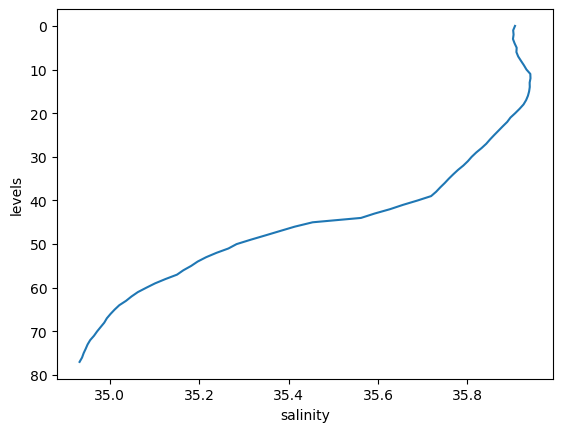

In [31]:
argo_mean.salinity.plot(y='levels', yincrease=False)

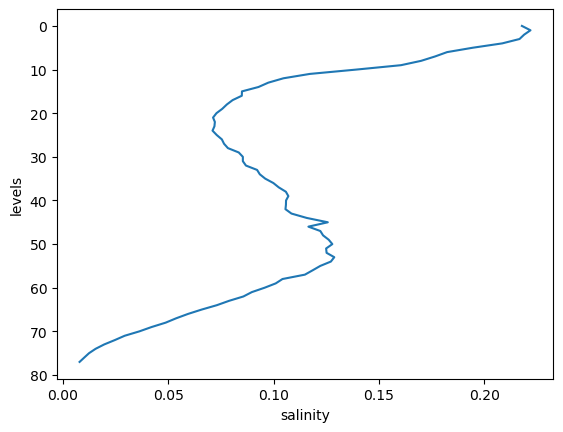

In [32]:
argo_std = argo.std(dim = 'date')
argo_std.salinity.plot(y='levels',yincrease=False)

In [37]:
for vname in argo.data_vars:
    print(argo[vname].coords)

Coordinates:
  * levels   (levels) int64 0 1 2 3 4 5 6 7 8 9 ... 69 70 71 72 73 74 75 76 77
  * date     (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07-24T...
    lon      (date) float64 -39.13 -37.28 -36.9 -36.89 ... -33.83 -34.11 -34.38
    lat      (date) float64 47.19 46.72 46.45 46.23 ... 42.72 42.6 42.46 42.38
Coordinates:
  * levels   (levels) int64 0 1 2 3 4 5 6 7 8 9 ... 69 70 71 72 73 74 75 76 77
  * date     (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07-24T...
    lon      (date) float64 -39.13 -37.28 -36.9 -36.89 ... -33.83 -34.11 -34.38
    lat      (date) float64 47.19 46.72 46.45 46.23 ... 42.72 42.6 42.46 42.38
Coordinates:
  * levels   (levels) int64 0 1 2 3 4 5 6 7 8 9 ... 69 70 71 72 73 74 75 76 77
  * date     (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07-24T...
    lon      (date) float64 -39.13 -37.28 -36.9 -36.89 ... -33.83 -34.11 -34.38
    lat      (date) float64 47.19 46.72 46.45 46.23 ... 42.72 42.6 42.46 42.38


In [42]:
gistemp_file = pooch.retrieve(
    'https://data.giss.nasa.gov/pub/gistemp/gistemp1200_GHCNv4_ERSSTv5.nc.gz',
    known_hash='4531668f9dd75fc262c3acc4c6dc4c6c2f3e7bfd40f97869eafbd70717ee3260',
    processor=pooch.Decompress(),
)

In [43]:
ds = xr.open_dataset(gistemp_file)
ds


ERROR 1: PROJ: proj_create_from_database: Open of /opt/sw/anaconda3/2023.09/envs/pangeo23/share/proj failed


<xarray.Dataset>
Dimensions:      (lat: 90, lon: 180, time: 1730, nv: 2)
Coordinates:
  * lat          (lat) float32 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon          (lon) float32 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
  * time         (time) datetime64[ns] 1880-01-15 1880-02-15 ... 2024-02-15
Dimensions without coordinates: nv
Data variables:
    time_bnds    (time, nv) datetime64[ns] ...
    tempanomaly  (time, lat, lon) float32 ...
Attributes:
    title:        GISTEMP Surface Temperature Analysis
    institution:  NASA Goddard Institute for Space Studies
    source:       http://data.giss.nasa.gov/gistemp/
    Conventions:  CF-1.6
    history:      Created 2024-03-08 11:37:27 by SBBX_to_nc 2.0 - ILAND=1200,...

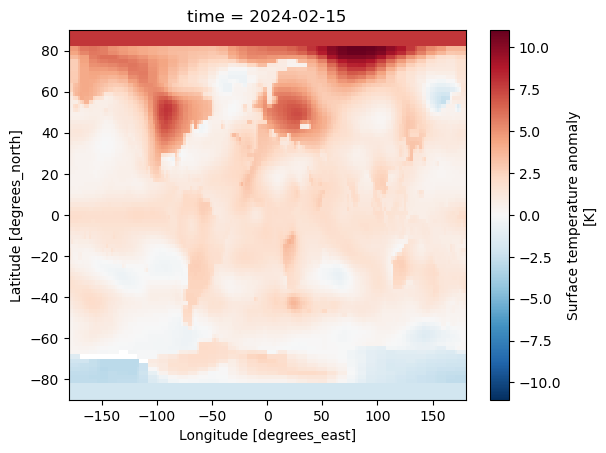

In [44]:
ds.tempanomaly.isel(time=-1).plot()

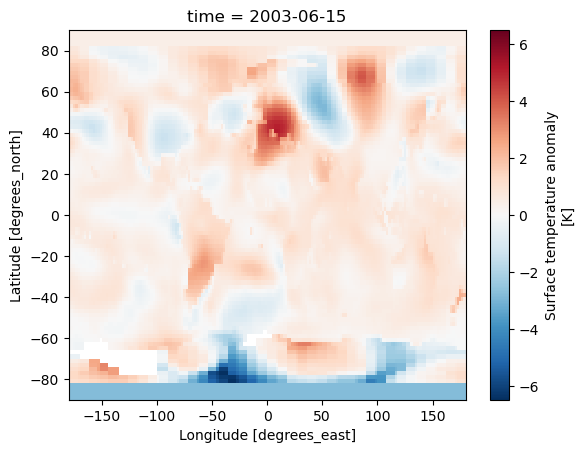

In [49]:
ds.tempanomaly.sel(time='2003-06').plot()

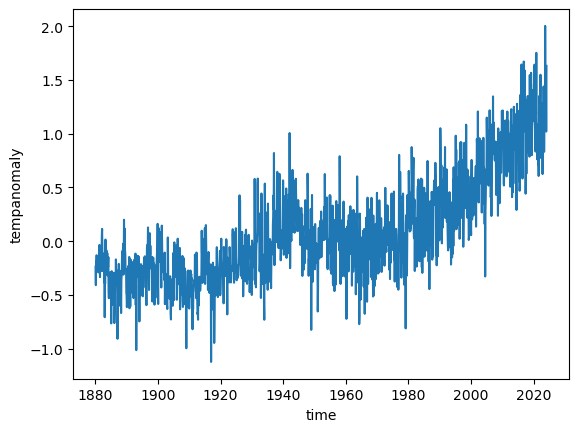

In [50]:
ds.tempanomaly.mean(dim=('lon','lat')).plot()

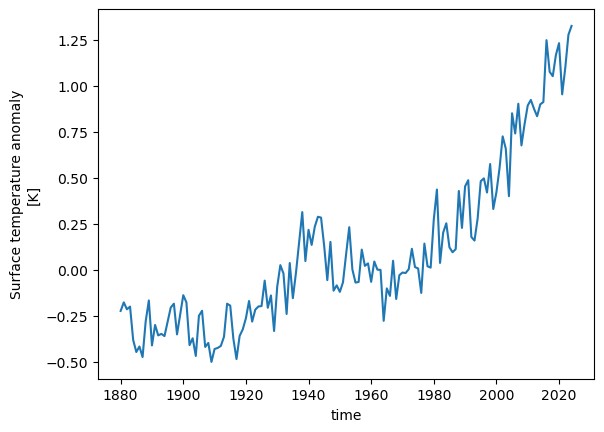

In [51]:
ds.tempanomaly.resample(time='YS').mean(dim=('time','lat','lon')).plot()

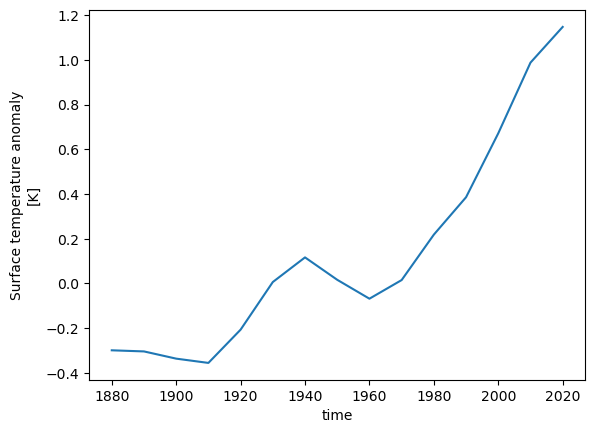

In [52]:
ds.tempanomaly.resample(time='10YS').mean(dim=('time','lat','lon')).plot()

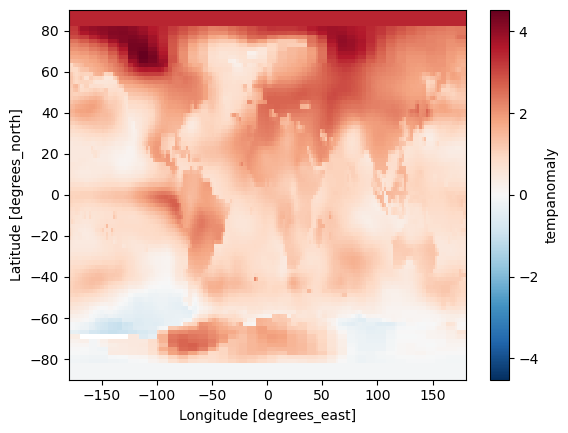

In [53]:
ds.tempanomaly.sel(time=slice('2023-01-01','2023-12-31')).mean(dim='time').plot()

In [8]:
import xarray as xr
mfds = xr.open_mfdataset('/data6/danielmw/GEOSChem.AerosolMass.*.nc4')

ERROR 1: PROJ: proj_create_from_database: Open of /opt/sw/anaconda3/2023.09/envs/pangeo23/share/proj failed


In [9]:
mfds

<xarray.Dataset>
Dimensions:          (time: 744, lev: 47, ilev: 48, lat: 113, lon: 221)
Coordinates:
  * time             (time) datetime64[ns] 2015-03-01T00:30:00 ... 2015-03-31...
  * lev              (lev) float64 0.9925 0.9775 0.9625 ... 0.0001387 3.8e-05
  * ilev             (ilev) float64 1.0 0.985 0.97 ... 0.0002113 6.6e-05 1e-05
  * lat              (lat) float64 -13.0 -12.75 -12.5 -12.25 ... 14.5 14.75 15.0
  * lon              (lon) float64 -17.81 -17.5 -17.19 ... 50.31 50.62 50.94
Data variables: (12/24)
    hyam             (time, lev) float64 dask.array<chunksize=(24, 47), meta=np.ndarray>
    hybm             (time, lev) float64 dask.array<chunksize=(24, 47), meta=np.ndarray>
    hyai             (time, ilev) float64 dask.array<chunksize=(24, 48), meta=np.ndarray>
    hybi             (time, ilev) float64 dask.array<chunksize=(24, 48), meta=np.ndarray>
    P0               (time) float64 1e+03 1e+03 1e+03 ... 1e+03 1e+03 1e+03
    AREA             (time, lat, lon) float32 dask.array<chunksize=(24, 113, 221), meta=np.ndarray>
    ...               ...
    AerMassNIT       (time, lev, lat, lon) float32 dask.array<chunksize=(24, 47, 113, 221), meta=np.ndarray>
    AerMassNH4       (time, lev, lat, lon) float32 dask.array<chunksize=(24, 47, 113, 221), meta=np.ndarray>
    AerMassLVOCOA    (time, lev, lat, lon) float32 dask.array<chunksize=(24, 47, 113, 221), meta=np.ndarray>
    AerMassINDIOL    (time, lev, lat, lon) float32 dask.array<chunksize=(24, 47, 113, 221), meta=np.ndarray>
    AerMassBC        (time, lev, lat, lon) float32 dask.array<chunksize=(24, 47, 113, 221), meta=np.ndarray>
    AerMassASOA      (time, lev, lat, lon) float32 dask.array<chunksize=(24, 47, 113, 221), meta=np.ndarray>
Attributes:
    title:                           GEOS-Chem diagnostic collection: Aerosol...
    history:                         
    format:                          NetCDF-3 with large file support
    conventions:                     COARDS
    ProdDateTime:                    
    reference:                       www.geos-chem.org; wiki.geos-chem.org
    contact:                         GEOS-Chem Support Team (geos-chem-suppor...
    simulation_start_date_and_time:  2015-03-01 00:00:00z
    simulation_end_date_and_time:    2015-04-01 00:00:00z

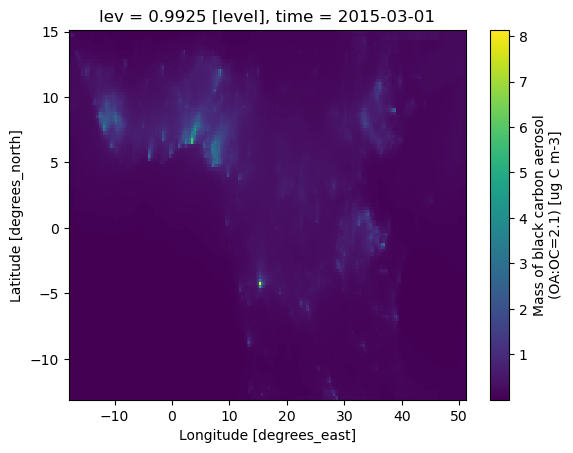

In [10]:
mfds.AerMassBC.isel(lev=0).resample(time='MS').mean(dim='time').plot()

In [11]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

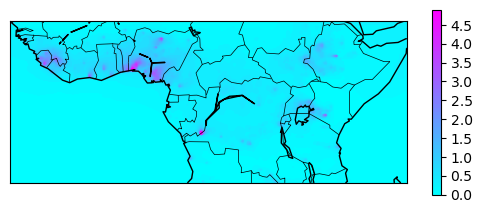

In [19]:
fig = plt.figure()
m = Basemap(llcrnrlat=mfds.lat[0], llcrnrlon=mfds.lon[0], 
            urcrnrlat=mfds.lat[-1],urcrnrlon=mfds.lon[-1], projection='cyl'
           )
m.drawcoastlines()
m.drawcountries()
clevels = np.arange(0,5,0.1)
plt.contourf(mfds.lon, mfds.lat, mfds.AerMassBC.isel(lev=0).resample(
    time='MS').mean(dim='time').squeeze(), clevels, cmap='cool')
plt.colorbar(shrink=0.5)
